In [2]:
from sympy import *
init_printing()

In [3]:
A = IndexedBase('A')
t = IndexedBase('t')
zeta, omega = symbols("zeta omega")
omega_d = omega * sqrt(1 - zeta ** 2)
i = symbols("i", cls=Idx)
omega_e, zeta_e = symbols('omega_e zeta_e')

In [4]:
C = Sum(A[i] * exp(zeta * omega * t[i]) * cos(omega_d * t[i]), [i, 1, 2])
S = Sum(A[i] * exp(zeta * omega * t[i]) * sin(omega_d * t[i]), [i, 1, 2])

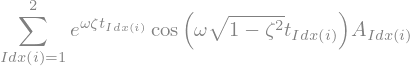

In [5]:
C

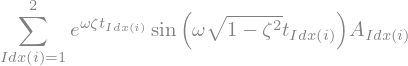

In [6]:
S

In [7]:
K = symbols('K')
# k_val

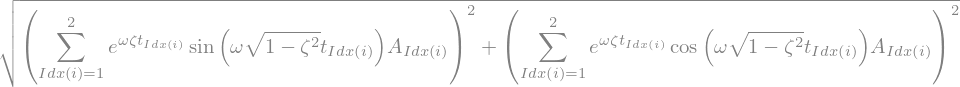

In [8]:
A_res = sqrt(C**2 + S**2)
A_res

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

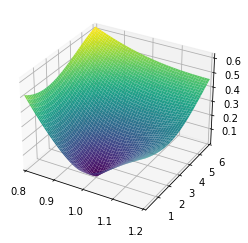

In [31]:
from sympy.plotting import plot, plot3d
import matplotlib.pyplot as plt
import numpy as np

def sensitivity(omega_error, zeta_error):
    # omega_error = 1.1
    omega_m = omega_error * omega
    zeta_m = zeta_error * zeta
    k_val = exp(zeta * pi / sqrt(1 - zeta ** 2))
    k_val_fake = exp(zeta_m * pi / sqrt(1 - zeta_m ** 2))
    A_1 = (K / (1 + K)).subs({K: k_val})
    A_2 = (1 / (1 + K)).subs({K: k_val_fake})
    t_1 = 0
    t_2 = pi / (omega_m * sqrt(1 - zeta_m**2))
    return A_res.doit().subs({omega: 50, zeta: 0.1, t[1]: t_1, t[2]: t_2, A[1]: A_1, A[2]: A_2})#.evalf()

graph = plot3d(sensitivity(omega_e, zeta_e), (omega_e, 0.8, 1.2), (zeta_e, 0.025, 6), show=False)
#graph.save('zv-sensitivity-3d.png')
graph = graph.backend(graph)
graph.process_series()
#plt.subplots_adjust(bottom=0)
graph.fig.savefig('zv-sensitivity-3d.png', dpi=300, bbox_inches=np.array([3, 3, 3]))

In [10]:
#tolerance = 0.05
#solve(sensitivity(omega_error) - tolerance, omega_error)

In [11]:
#import numpy as np

#tolerance = 0.05
#domain = np.linspace(0.8, 1.2, 100)
#scalar_func = lambda x: abs(float(sensitivity(omega_error).evalf(subs={omega_error: x})) - tolerance)
#vector_func = np.vectorize(scalar_func)
#idx = np.argmin(vector_func(domain))
#domain[idx]